In [1]:
TRACTO="whole_brain_6_1500000"#"LongueFibres_SIFT"
TRACTO_RES="FOS"
MESH="lh.white.ras"
ATLAS_FA = "/home/global/fsl509/data/atlases/JHU/JHU-ICBM-FA-2mm.nii.gz"
ATLAS_LABEL = "/home/global/fsl509/data/atlases/JHU/JHU-ICBM-labels-2mm.nii.gz"

FDWI = DTI_PATH+"dti.nii.gz"
FBVAL = DTI_PATH+"dti.bval"
FBVEC = DTI_PATH+"dti.bvec"
data_dwi, affine = load_nifti(FDWI)
bvals, bvecs = read_bvals_bvecs(FBVAL,FBVEC)
gtab = gradient_table(bvals,bvecs)

NameError: name 'DTI_PATH' is not defined

In [ ]:
from dipy.io import read_bvals_bvecs
from dipy.core.gradients import gradient_table
from dipy.reconst.dti import TensorModel
from dipy.reconst.csdeconv import (ConstrainedSphericalDeconvModel,auto_response)
from dipy.reconst.shm import CsaOdfModel
from dipy.direction import ProbabilisticDirectionGetter
from dipy.viz import fvtk
from dipy.viz.colormap import line_colors
from dipy.tracking.local import LocalTracking
from dipy.tracking.local import ThresholdTissueClassifier
from dipy.tracking import utils
from dipy.data import default_sphere
from dipy.direction import peaks_from_model

from skimage import segmentation
from skimage import measure


import nipype.interfaces.mrtrix as mrt
from nibabel import trackvis as tv


In [1]:
from dipy.io.image import load_nifti, save_nifti
from skimage import morphology

import nipype.interfaces.fsl
SUBJ_ID="AUMONT^SEBASTIEN_I_CERE_2014-08-12"
NAS="dumbo"
protocole="strokconnect"
DIR_PATH="/NAS/"+NAS+"/protocoles/"+protocole
FS_PATH=DIR_PATH+"/QA_DTI/"
DTI_PATH=FS_PATH+SUBJ_ID+"/dti/"
SUBJ_FA = DTI_PATH+"dti_finalcor_FA.nii"
SEG = FS_PATH+SUBJ_ID+"/mri/"+"raparc+aseg.nii.gz"
data_fa, affine = load_nifti(SUBJ_FA)
data_seg, affine = load_nifti(SEG)
DTI = DTI_PATH+"dti_finalcor.nii.gz"
data_dti, affine_dti = load_nifti(DTI)

[[[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 ..., 
 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  

In [29]:
print(data_dti.shape)
for i in range(1,33) :
    test=data_dti[:,:,:,i]*mask_cc
    print(np.nanmean(test))

(128, 128, 66, 33)
0.0203483
0.0480202
0.048363
0.0493973
0.0471771
0.0462813
0.0426214
0.0462378
0.0489263
0.0470718
0.0385101
0.0481924
0.0273326
0.0292307
0.0483594
0.0284986
0.0254431
0.0221674
0.0418928
0.0239094
0.0272426
0.0437783
0.0483316
0.0392861
0.0197748
0.0204368
0.0258557
0.0476663
0.0475319
0.0405103
0.033158
0.0201055


True


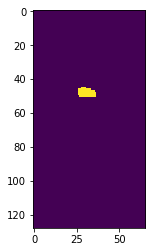

In [36]:
print(np.amax(mask_cc[61,:,:]))
plt.imshow(mask_cc[61,:,:])
plt.show()

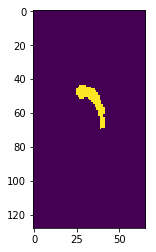

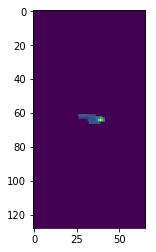

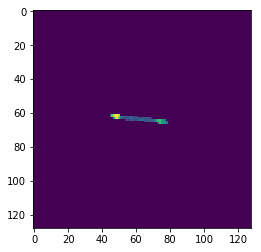

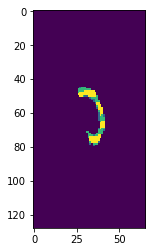

In [10]:
from matplotlib import pyplot as plt
import numpy as np
val=0.8
#mask = data_fa > val
mask_cc=((data_seg >= 250) & (data_seg <= 255)) # | (data_fa > val)
filter_mask_cc = morphology.remove_small_objects(mask_cc)
#clear_image = segmentation.clear_border(filter_mask_cc)
#filter_mask_cc_f = morphology.binary_erosion(morphology.binary_dilation(filter_mask_cc))
filter_mask_cc_d = morphology.binary_dilation(filter_mask_cc);
plt.imshow(filter_mask_cc_d[62,:,:])
plt.show()

tmp=np.sum(filter_mask_cc,axis=1)
plt.imshow(tmp[:,:])
plt.show()

tmp=np.sum(filter_mask_cc,axis=2)
plt.imshow(tmp[:,:])
plt.show()

tmp=np.sum(filter_mask_cc,axis=0)
plt.imshow(tmp[:,:])
plt.show()